In [1]:
import cv2 
import torch 
import matplotlib.pyplot as plt

from models.space_net import SPACE
from utils import decompose_imgs, compose_imgs
from ssim_map import pos_similarity_ratio

In [2]:
img = cv2.imread("./test_images/pexels-matheus-bertelli-7410722.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
orig_img = img.copy()
img = torch.from_numpy(img).permute(2,0,1).unsqueeze(0) / 255. 

y, cbcr = decompose_imgs(img)
gamma = 2.2
k = 0.6
R = 1 - k ** gamma
y_R = y * k

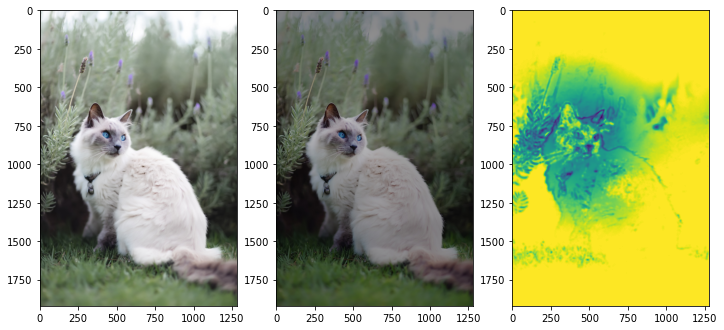

In [3]:
model = SPACE(use_center_bias=True, use_gfcorrection=True, use_len=True)
model.load_state_dict(torch.load("./pretrained_weights/salicon_space-cbgflen_sal.pth"))

with torch.no_grad():
    y_hat = model(y, R=R)

rgb_hat = torch.clamp(compose_imgs(y_hat, cbcr), 0., 1.)
cd = pos_similarity_ratio(y_hat, y_R, y)

img_out = rgb_hat.squeeze().permute(1,2,0).cpu().numpy()
cd_out = -cd.squeeze().cpu().numpy()

f, axarr = plt.subplots(1,3, figsize=(12,12))
axarr[0].imshow(orig_img)
axarr[1].imshow(img_out)
axarr[2].imshow(cd_out)
plt.show()
